# NP Tut 3 --- KDSMIL001

## Naive attempt
First off, we can use `numpy` and `scipy` to find the means, variances, and correlation coefficients, as well as do a linear regression. Then simply plot all 4 data sets with their best fit lines. The code for this is below.

Here are all 4 plots:

<p align="middle">
  <img src="x_y1.png" width="300" />
  <img src="x_y2.png" width="300" /> 
</p>

<p align="middle">
  <img src="x_y3.png" width="300" />
  <img src="x4_y4.png" width="300" /> 
</p>

We can see that all 4 data sets have pretty much the same means, variances, correlation coefficients, and linear regression fit parameters, at least up to a few decimal places. This really is surprising when looking at the data for each set since they are all quite different. The most surprising is the fourth set, where the x-values aren't even the same as the previous three. 

What this really tells us is that blindly using statistics for a data set before having a quick look at the general trend is really a bad idea. 
- The first data set is the most reasonable to apply these statistics to as it seems to have a linear trend and the data don't seem to be doing anything too wild. 
- The second set is *clearly* some sort of parabola or other higher order polynomial, so fitting a linear regression to it is absolutely nonsensical. 
- The third set is one that can really do with some quick inspection before analysing as it has a clear outlier, or perhaps shows some interesting physics such as the Higgs mass, thus requires a more nuanced approach,
- The final set is similar to the third in that there is clearly an outlier, but it's not simply linear if that is removed, as all x-values are 8, so there is more going on here.

## Fixing 2 and 3
In order to fix the second set all we need to do is instead fit a parabola with `curve_fit`, giving us the much nicer plot:

<p align="middle">
<img src="x_y2_par.png" width="500" />
</p>

We see a pretty great chi squared value and visually see the fit is much better.

We can also fix the third set by removing the outlier, giving us something that is exactly linear:

<p align="middle">
<img src="x_y3_fixed.png" width="500" />
</p>

With a correlation coefficient of exactly 1, we can be quite sure this was a reasonable removal.


## Final Thoughts
There are two points to note at the end of this analysis. Firstly, we see that we can get almost exactly the same statistics for wildly different-looking data sets. For this reason, these statistics are unreliable unless used on very specific data sets.

We also noticed that applying a linear regression blindly, even with a fairly good correlation coefficient, can sometimes be wildly incorrect, as is the case with the second set.
***

Importing Packages

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats
import scipy.optimize

Importing Data

In [4]:
data1 = pd.read_csv('data1.csv')
data2 = pd.read_csv('data2.csv')


x = data1['x'].to_numpy()
y1 = data1['y1'].to_numpy()
y2 = data1['y2'].to_numpy()
y3 = data1['y3'].to_numpy()

x4 = data2['x4'].to_numpy()
y4 = data2['y4'].to_numpy()

xPlot = np.linspace(np.min(x), np.max(x), 100)      # For use when plotting

Now finding the mean and variance for x and y:

In [5]:
xMean = np.mean(x)
y1Mean = np.mean(y1)
y2Mean = np.mean(y2)
y3Mean = np.mean(y3)

x4Mean = np.mean(x4)
y4Mean = np.mean(y4)

xVar = np.var(x)
y1Var = np.var(y1)
y2Var = np.var(y2)
y3Var = np.var(y3)

x4Var = np.var(x4)
y4Var = np.var(y4)

Linear regression, no need for anything fancy

In [6]:
x_y1LinRegress = scipy.stats.linregress(x, y1)
x_y2LinRegress = scipy.stats.linregress(x, y2)
x_y3LinRegress = scipy.stats.linregress(x, y3)

x4_y4LinRegress = scipy.stats.linregress(x4, y4)

Now for each data set we plot the data and their best fit line, showing the mean, variance, and correlation coefficient on each

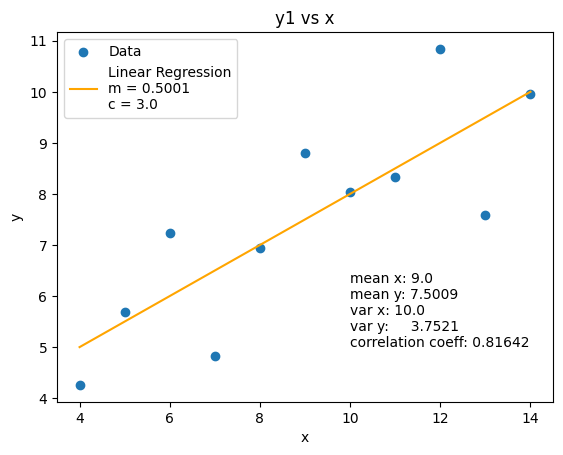

In [7]:
vals = f'mean x: {xMean:.5}\nmean y: {y1Mean:.5}\nvar x: {xVar:.5}\nvar y: \
    {y1Var:.5}\ncorrelation coeff: {x_y1LinRegress[2]:.5}'

plt.figure()
plt.scatter(x, y1, label='Data')
plt.plot(xPlot, xPlot * x_y1LinRegress[0] + x_y1LinRegress[1], color='orange', \
    label=f'Linear Regression\nm = {x_y1LinRegress[0]:.4}\nc = {x_y1LinRegress[1]:.4}')
plt.text(10, 5, vals)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('y1 vs x')
plt.show()

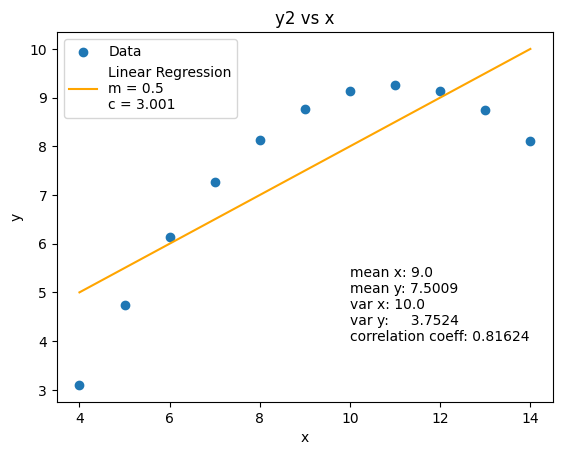

In [8]:
vals = f'mean x: {xMean:.5}\nmean y: {y2Mean:.5}\nvar x: {xVar:.5}\nvar y: \
    {y2Var:.5}\ncorrelation coeff: {x_y2LinRegress[2]:.5}'

plt.figure()
plt.scatter(x, y2, label='Data')
plt.plot(xPlot, xPlot * x_y2LinRegress[0] + x_y2LinRegress[1], color='orange', \
    label=f'Linear Regression\nm = {x_y2LinRegress[0]:.4}\nc = {x_y2LinRegress[1]:.4}')
plt.text(10, 4, vals)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('y2 vs x')
plt.show()

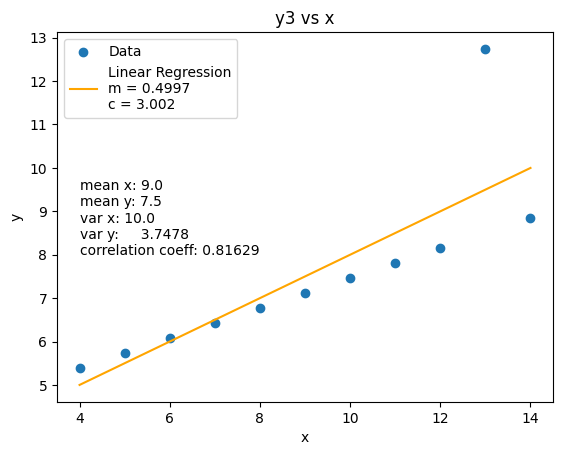

In [9]:
vals = f'mean x: {xMean:.5}\nmean y: {y3Mean:.5}\nvar x: {xVar:.5}\nvar y: \
    {y3Var:.5}\ncorrelation coeff: {x_y3LinRegress[2]:.5}'

plt.figure()
plt.scatter(x, y3, label='Data')
plt.plot(xPlot, xPlot * x_y3LinRegress[0] + x_y3LinRegress[1], color='orange', \
    label=f'Linear Regression\nm = {x_y3LinRegress[0]:.4}\nc = {x_y3LinRegress[1]:.4}')
plt.text(4, 8, vals)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('y3 vs x')
plt.show()

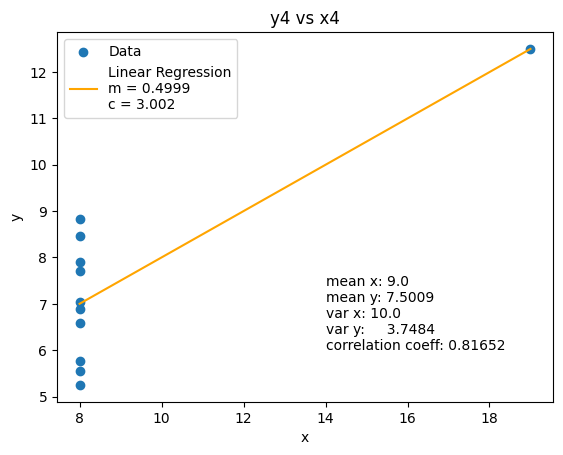

In [10]:
vals = f'mean x: {x4Mean:.5}\nmean y: {y4Mean:.5}\nvar x: {x4Var:.5}\nvar y: \
    {y4Var:.5}\ncorrelation coeff: {x4_y4LinRegress[2]:.5}'

x4Plot = np.linspace(np.min(x4), np.max(x4), 100)

plt.figure()
plt.scatter(x4, y4, label='Data')
plt.plot(x4Plot, x4Plot * x4_y4LinRegress[0] + x4_y4LinRegress[1], color='orange', \
    label=f'Linear Regression\nm = {x4_y4LinRegress[0]:.4}\nc = {x4_y4LinRegress[1]:.4}')
plt.text(14, 6, vals)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('y4 vs x4')
plt.show()

We can also try out analysing the middle two sets with a bit of human input, using a parabola in the second set and removing outliers in the third.

In [11]:
y3New = np.delete(y3, 2)
x3New = np.delete(x, 2)

x3Mean_New = np.mean(x3New)
y3Mean_New = np.mean(y3New)
x3Var_New = np.var(x3New)
y3Var_New = np.var(y3New)

New y2 plotting

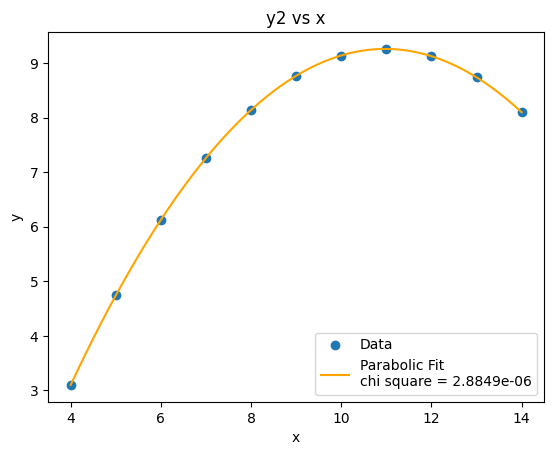

In [12]:
def parabola(x, a, b, c):
    return a * x**2 + b * x + c

popt2, pcov2 = scipy.optimize.curve_fit(parabola, x, y2, [1, 1, 1])

chi2_2 = scipy.stats.chisquare(y2, parabola(x, *popt2))

plt.figure()
plt.scatter(x, y2, label='Data')
plt.plot(xPlot, parabola(xPlot, *popt2), color='orange', \
    label=f'Parabolic Fit\nchi square = {chi2_2[0]:.5}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('y2 vs x')
plt.show()

New y3 plotting, where we have removed the outlier and are aiming for a linear fit

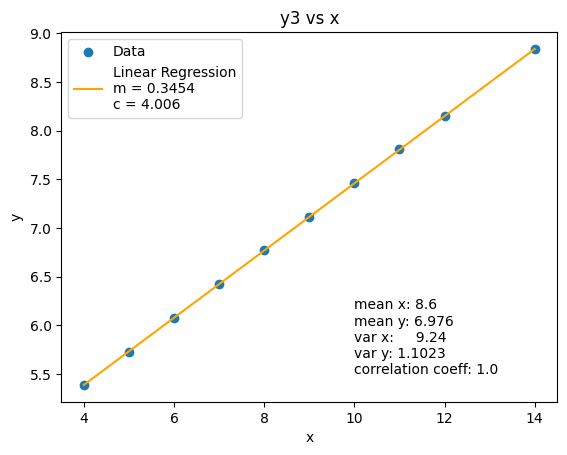

In [13]:
x_y3LinRegress_New = scipy.stats.linregress(x3New, y3New)

vals = f'mean x: {x3Mean_New:.5}\nmean y: {y3Mean_New:.5}\nvar x: \
    {x3Var_New:.5}\nvar y: {y3Var_New:.5}\ncorrelation coeff: {x_y3LinRegress_New[2]:.5}'

plt.figure()
plt.scatter(x3New, y3New, label='Data')
plt.plot(xPlot, xPlot * x_y3LinRegress_New[0] + x_y3LinRegress_New[1], color='orange', \
    label=f'Linear Regression\nm = {x_y3LinRegress_New[0]:.4}\nc = {x_y3LinRegress_New[1]:.4}')
plt.text(10, 5.5, vals)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('y3 vs x')
plt.show()

The fourth set doesn't quite work as all its x-values are 8, so there's something weird going on that I don't really want to analyse.